In [1]:
!pip install progressbar2
# !pip install faiss-cpu
import networkx as nx
import pandas as pd

In [15]:
!pip install -- upgrade ipykernel
!pip install --upgrade ipywidgets

ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade
     |████████████████████████████████| 123 kB 5.7 MB/s eta 0:00:01
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0


In [2]:
import json
import numpy as np
import os
import progressbar
import sys
from copy import deepcopy
import faiss
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import(word_tokenize, sent_tokenize, TreebankWordTokenizer, wordpunct_tokenize, TweetTokenizer, MWETokenizer)

In [3]:
def get_embedding(sent, d = 300): ## ignores the words not present in the vocabulary, returns 0 vector in case of empty string or string in which no word has any embedding
    res = np.zeros((d,), dtype = 'float32')
    count = 0
    words = list(word_tokenize(sent))
    for word in words:
        try:
            res = res + embed_directory[word]
            count += 1
        except:
            continue
    if (count > 0):
        res = res / count
    return res

In [4]:
## saved Glove embeddings at 'glove.42B.300d/word_embed_0_19174.json'
## just load them
def load_split_saved_embeddings(folder_name):
    global embed_directory
    embed_directory = {}
    
    print('reading files')
    sys.stdout.flush()
    
    # ###### to show progress
    # l = len(os.listdir(folder_name))
    # widgets = [' [', progressbar.Timer(format= 'elapsed time: %(elapsed)s'), '] ', progressbar.Bar('*'),' (', progressbar.ETA(), ') ', ]
    # bar = progressbar.ProgressBar(max_value=l, widgets=widgets).start()
    # count = 0
    # ###### to show progress
    
    
    for file in os.listdir(folder_name):
        if file == '.ipynb_checkpoints':
            continue
        with open(folder_name + '/' + file , 'r') as f:
            embed_directory = {**embed_directory, **json.load(f)}
        # count += 1
        # bar.update(count)
    
    print('converting to numpy array')
    sys.stdout.flush()
    
    # ###### to show progress
    # l = len(embed_directory.keys())
    # count = 0
    # widgets = [' [', progressbar.Timer(format= 'elapsed time: %(elapsed)s'), '] ', progressbar.Bar('*'),' (', progressbar.ETA(), ') ', ]
    # bar = progressbar.ProgressBar(max_value=l, widgets=widgets).start()
    # ###### to show progress
    
    for word in embed_directory:
        embed_directory[word] = np.asarray(embed_directory[word], dtype = 'float32')
        # count += 1
        # bar.update(count)

In [ ]:
load_split_saved_embeddings('glove.42B.300d')

reading files


In [ ]:
cso_df = pd.read_csv("./CSO_data/CSO_salesforce_extracted_entities.csv")
cso_df.head()


In [ ]:
cso_df.rename(columns = {'remediations': 'remediation'}, inplace = True)

In [ ]:
embedding_dict = {}
for index, row in cso_df.iterrows():
    print(row['cso_number']," doing")
    temp_dic = {}
    temp_dic['symptom'] = get_embedding(str(row['symptom']))
    temp_dic['root_cause'] = get_embedding(str(row['root_cause']))
    temp_dic['remediation'] = get_embedding(str(row['remediation']))
    embedding_dict[row['cso_number']] = temp_dic
    print(row['cso_number']," done")

In [30]:
embedding_dict[17972]

{'symptom': array([-8.16734880e-03, -7.65271410e-02, -4.99504395e-02, -1.22204244e-01,
         1.04641244e-01,  4.68931273e-02, -3.35303640e+00,  4.77195263e-01,
        -6.49088994e-02, -1.52368993e-01, -8.66431594e-02,  1.76884860e-01,
        -4.15758118e-02, -3.23983990e-02, -4.90406416e-02,  1.74767673e-02,
        -4.25514067e-03, -8.95513669e-02,  3.81116122e-02,  8.36872030e-03,
        -5.91245070e-02,  6.86937571e-02, -9.64328945e-02,  6.86032251e-02,
        -5.72893620e-02, -7.80390874e-02,  6.18966222e-02, -2.16655806e-01,
        -5.68231791e-02,  4.65034433e-02, -1.80044144e-01,  6.23331182e-02,
         1.49722278e-01, -7.63476565e-02, -1.22637220e-01, -8.71224776e-02,
        -2.89148465e-02, -1.54951960e-01,  6.77907839e-02, -9.74981487e-02,
         1.07621536e-01, -2.01650690e-02,  2.70073134e-02, -9.47373360e-02,
        -5.43566905e-02, -2.69789752e-02,  8.42971057e-02, -1.29065350e-01,
        -1.91934139e-01, -3.62650082e-02, -8.27670544e-02,  4.10348922e-03,
 

In [36]:
import pickle

g = pickle.load(open('gcn_data/bipartite-ckg.gpickle', 'rb'))
# consists of symtoms and rc cluster graphs

In [16]:
# our gcn model requires graph as input
indices = []
mapping = {}
embeddings = np.zeros((len(g.nodes()), 300), dtype = 'float32')
for i, (node, dic) in enumerate(list(g.nodes(data = True))):
    mapping[i] = node
    indices.append(node)
    embeddings[i] = dic['embedding']

('17972_sym', {'embedding': array([-8.16734880e-03, -7.65271410e-02, -4.99504395e-02, -1.22204244e-01,
        1.04641244e-01,  4.68931273e-02, -3.35303640e+00,  4.77195263e-01,
       -6.49088994e-02, -1.52368993e-01, -8.66431594e-02,  1.76884860e-01,
       -4.15758118e-02, -3.23983990e-02, -4.90406416e-02,  1.74767673e-02,
       -4.25514067e-03, -8.95513669e-02,  3.81116122e-02,  8.36872030e-03,
       -5.91245070e-02,  6.86937571e-02, -9.64328945e-02,  6.86032251e-02,
       -5.72893620e-02, -7.80390874e-02,  6.18966222e-02, -2.16655806e-01,
       -5.68231791e-02,  4.65034433e-02, -1.80044144e-01,  6.23331182e-02,
        1.49722278e-01, -7.63476565e-02, -1.22637220e-01, -8.71224776e-02,
       -2.89148465e-02, -1.54951960e-01,  6.77907839e-02, -9.74981487e-02,
        1.07621536e-01, -2.01650690e-02,  2.70073134e-02, -9.47373360e-02,
       -5.43566905e-02, -2.69789752e-02,  8.42971057e-02, -1.29065350e-01,
       -1.91934139e-01, -3.62650082e-02, -8.27670544e-02,  4.10348922e-0

In [ ]:
nodes_df = pd.DataFrame(index = indices)

In [17]:
for i in range(300):
    temp = pd.DataFrame({i : embeddings[:,i]}, index = indices)
    nodes_df = pd.concat([nodes_df, temp], axis = 1)

In [18]:
nodes_df.head()     # passed to stellargraph

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
17972_sym,-0.008167,-0.076527,-0.049950,-0.122204,0.104641,0.046893,-3.353036,0.477195,-0.064909,-0.152369,...,0.077854,-0.112163,-0.109823,-0.064054,0.059830,-0.058183,0.018114,-0.035441,0.073859,-0.043815
17972_rc,0.099699,-0.095231,0.054202,0.082008,0.000597,-0.103185,-3.615350,0.638418,0.214786,-0.127499,...,0.089757,-0.167037,-0.055334,-0.091216,0.061198,-0.007899,-0.010709,0.099092,0.168092,-0.142709
17941_sym,0.027697,-0.142060,-0.032334,-0.131817,0.150063,0.030662,-3.514226,0.374671,-0.034621,-0.154487,...,0.112040,-0.103839,-0.077270,-0.062581,0.036108,-0.027922,-0.098873,-0.073493,0.064984,-0.055790
17941_rc,-0.061194,-0.153897,-0.054075,-0.149992,0.019621,-0.247406,-3.654212,0.406615,0.054067,-0.189100,...,-0.007128,-0.142740,-0.140918,-0.029184,0.107133,0.092872,-0.020932,-0.013493,-0.023403,0.011175
17929_sym,0.014565,-0.065975,-0.056290,-0.031044,0.183557,-0.048841,-3.205671,0.465190,-0.031633,-0.093068,...,0.083284,-0.069067,-0.027363,-0.126645,0.046085,-0.014861,0.013089,-0.079503,0.026521,-0.141690


In [19]:
## stellargraph nodes
!pip install stellargraph
import stellargraph as sg

/opt/conda/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [20]:
from stellargraph import StellarGraph

In [21]:
source = []
target = []
for edge in list(g.edges()):
    source.append(edge[0])
    target.append(edge[1])

In [22]:
edge_df = pd.DataFrame({'source':source, 'target':target})

In [23]:
g1 = StellarGraph(nodes_df, edge_df)

In [24]:
print(g1.info())

StellarGraph: Undirected multigraph
 Nodes: 748, Edges: 6537

 Node types:
  default: [748]
    Features: float32 vector, length 300
    Edge types: default-default->default

 Edge types:
    default-default->default: [6537]
        Weights: all 1 (default)
        Features: none


In [25]:
import random

In [31]:
cso_list = list(embedding_dict.keys())

In [32]:
# start data augmentation
import json
# get clusters of symtoms - there is a symptom-symptom edge between any two nodes of the same cluster
with open('gcn_data/sym_clusters_dict.json', 'r') as f:
    sym_cluster_list = json.load(f)

In [33]:
sym_cluster_list

{'48': [17972, 16532, 14584, 10302, 10182, 9093, 7582, 7136, 6819],
 '60': [17941, 17121, 16536, 11572, 10017],
 '25': [17929, 17893, 15019, 13808, 12686],
 '38': [17896, 17685, 17426, 15932, 15572, 13450, 6023],
 '9': [17861, 16628],
 '28': [17790, 13738, 8775],
 '95': [17780, 17088, 16425, 15912, 15523, 15282],
 '117': [17662],
 '57': [17657, 17648, 17401, 14886],
 '2': [17536,
  17510,
  17232,
  17070,
  16649,
  16516,
  16207,
  15050,
  14932,
  14536,
  14072,
  14055,
  13318,
  9126,
  8343,
  6101,
  6025],
 '26': [17526, 14571, 14449, 13678],
 '93': [17522],
 '65': [17507, 17152, 14945, 14460],
 '45': [17388, 17315, 17266],
 '30': [17384, 17092, 16411, 14722, 14490, 8548],
 '6': [17329,
  16964,
  16667,
  16538,
  15560,
  15334,
  12626,
  12303,
  12052,
  11168,
  10886,
  10769,
  8468,
  7018,
  6738,
  6215],
 '5': [17368, 16218, 15143, 14541, 14310, 14073, 12517, 6374, 6119],
 '43': [17317, 16480],
 '85': [17314],
 '75': [17305],
 '105': [17279],
 '3': [17265,
  162

In [11]:
with open('gcn_data/rc_clusters_dict.json', 'r') as f:
    rc_cluster_list = json.load(f)

In [12]:
sym_label_dict = {}
rc_label_dict = {}
# maps a cso to its corresponding cluster label
for label in sym_cluster_list:
    for cso in sym_cluster_list[label]:
        sym_label_dict[str(cso) + '_sym'] = label

for label in rc_cluster_list:
    for cso in rc_cluster_list[label]:
        rc_label_dict[str(cso) + '_rc'] = label


In [13]:
sym_label_dict

{'17972_sym': '48',
 '16532_sym': '48',
 '14584_sym': '48',
 '10302_sym': '48',
 '10182_sym': '48',
 '9093_sym': '48',
 '7582_sym': '48',
 '7136_sym': '48',
 '6819_sym': '48',
 '17941_sym': '60',
 '17121_sym': '60',
 '16536_sym': '60',
 '11572_sym': '60',
 '10017_sym': '60',
 '17929_sym': '25',
 '17893_sym': '25',
 '15019_sym': '25',
 '13808_sym': '25',
 '12686_sym': '25',
 '17896_sym': '38',
 '17685_sym': '38',
 '17426_sym': '38',
 '15932_sym': '38',
 '15572_sym': '38',
 '13450_sym': '38',
 '6023_sym': '38',
 '17861_sym': '9',
 '16628_sym': '9',
 '17790_sym': '28',
 '13738_sym': '28',
 '8775_sym': '28',
 '17780_sym': '95',
 '17088_sym': '95',
 '16425_sym': '95',
 '15912_sym': '95',
 '15523_sym': '95',
 '15282_sym': '95',
 '17662_sym': '117',
 '17657_sym': '57',
 '17648_sym': '57',
 '17401_sym': '57',
 '14886_sym': '57',
 '17536_sym': '2',
 '17510_sym': '2',
 '17232_sym': '2',
 '17070_sym': '2',
 '16649_sym': '2',
 '16516_sym': '2',
 '16207_sym': '2',
 '15050_sym': '2',
 '14932_sym': '

In [40]:
#noisy edges added for data augmentation
noisy_edges = []
for cso in cso_list:
    #find one hop neigbours of sym
    sym_label = sym_label_dict[str(cso) + '_sym']
    sym_neighbours = list(set(sym_cluster_list[sym_label]) - set([cso]))
    
    #find one hop neigbours of rc
    rc_label = rc_label_dict[str(cso) + '_rc']
    rc_neighbours = list(set(rc_cluster_list[rc_label]) - set([cso]))
    
    #append noisy edge
    for a in sym_neighbours:
        for b in rc_neighbours:
            noisy_edges.append([str(a) + '_sym', str(b) + '_rc'])

In [41]:
# true_edges len is 374
noisy_edges_con = []  ## make true edges 5% of noisy edges
random.shuffle(noisy_edges)
for i in range(7106):            #5% of 7106  = 374
    noisy_edges_con.append(noisy_edges[i])

In [42]:
374*100/(len(noisy_edges_con) + 374)     # 5% check

5.0

In [43]:
rc_list = [str(cso) + '_rc' for cso in cso_list]
rc_set = set(rc_list)
# map of a symptom to all positive root causes
positive_edges = {}
negative_edges = {}
for edge in noisy_edges_con:
    if edge[0] in positive_edges.keys():
        positive_edges[edge[0]].append(edge[1])
    else:
        positive_edges[edge[0]] = [edge[1]]
    
    #negative_root_causes = list of all root causes - pos_root_causes
    negative_edges[edge[0]] = list(rc_set - set(positive_edges[edge[0]]))

In [44]:
positive_edges['16571_sym']

['10336_rc',
 '10336_rc',
 '15461_rc',
 '12041_rc',
 '7050_rc',
 '14224_rc',
 '8877_rc',
 '7002_rc',
 '15215_rc']

In [45]:
negative_edges['16571_sym']

['8837_rc',
 '6738_rc',
 '14945_rc',
 '14961_rc',
 '10365_rc',
 '7935_rc',
 '6119_rc',
 '6577_rc',
 '15523_rc',
 '12606_rc',
 '16628_rc',
 '8310_rc',
 '14204_rc',
 '8657_rc',
 '11290_rc',
 '10312_rc',
 '15758_rc',
 '12998_rc',
 '17780_rc',
 '10850_rc',
 '10597_rc',
 '10013_rc',
 '14490_rc',
 '16494_rc',
 '10190_rc',
 '8585_rc',
 '8209_rc',
 '12615_rc',
 '9408_rc',
 '14865_rc',
 '6214_rc',
 '9675_rc',
 '17685_rc',
 '12052_rc',
 '8343_rc',
 '15463_rc',
 '16463_rc',
 '17266_rc',
 '8630_rc',
 '15785_rc',
 '6165_rc',
 '8566_rc',
 '17152_rc',
 '11168_rc',
 '11986_rc',
 '10145_rc',
 '6572_rc',
 '13877_rc',
 '17526_rc',
 '7987_rc',
 '14722_rc',
 '17510_rc',
 '6578_rc',
 '12598_rc',
 '13630_rc',
 '14310_rc',
 '15813_rc',
 '17522_rc',
 '7991_rc',
 '6147_rc',
 '16538_rc',
 '12187_rc',
 '17657_rc',
 '15221_rc',
 '7012_rc',
 '16755_rc',
 '14460_rc',
 '7836_rc',
 '13662_rc',
 '17265_rc',
 '10641_rc',
 '9056_rc',
 '15739_rc',
 '9582_rc',
 '6810_rc',
 '14541_rc',
 '13840_rc',
 '17121_rc',
 '16643_rc',

In [46]:
#true edges are s-rc pair
true_edges = [[str(cso) + '_sym', str(cso) + '_rc'] for cso in cso_list]
total_edges  = true_edges + noisy_edges_con

In [48]:
# train-test split
train_true_edges = true_edges[:53]         # x = 14% of total_edges (=7480)
train_noisy_edges= noisy_edges_con[:995]
edge_ids_train = train_true_edges + train_noisy_edges

374
7106
1048


In [49]:
test_true_edges = true_edges[53:106]
test_noisy_edges = noisy_edges_con[995:1990]
edge_ids_test = test_true_edges + test_noisy_edges
#test batch size must be equal to train batch size

1048
['16628_sym', '16628_rc']


# GCN_Model

In [50]:
import sys
import tensorflow as tf

In [51]:
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator, FullBatchNodeGenerator
from stellargraph.layer import GCN, LinkEmbedding


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [52]:
print(g1.info())

StellarGraph: Undirected multigraph
 Nodes: 748, Edges: 6537

 Node types:
  default: [748]
    Features: float32 vector, length 300
    Edge types: default-default->default

 Edge types:
    default-default->default: [6537]
        Weights: all 1 (default)
        Features: none


In [53]:
import numpy as np
edge_ids_train = np.asarray(edge_ids_train)     
edge_ids_test = np.asarray(edge_ids_test)

#labels are not used here, just given because the function demands it
edge_labels_train = np.ones(edge_ids_train.shape)
edge_labels_test = np.ones(edge_ids_test.shape)

In [57]:
# train_flow dictates the order in which gcn representations must be computed
train_gen = FullBatchLinkGenerator(g1, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)   

Using GCN (local pooling) filters...


In [59]:
test_gen = FullBatchLinkGenerator(g1, method="gcn")
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [60]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)
print(gcn.use_sparse)

True


In [61]:
x_inp, x_out = gcn.in_out_tensors()

In [62]:
out = keras.layers.Dense(16, activation = 'relu')(x_out)

In [63]:
import random

def custom_loss(y_true, y_pred):
    
    y_pred = y_pred[0]
    sym = y_pred[:, 0, :]
    rc = y_pred[:, 1, :]
    rc_t = tf.transpose(rc)
    
    mul = tf.math.exp(tf.linalg.matmul(sym, rc_t))
    
    # Choose a random symptom - numerator
    i = random.randint(0, (edge_ids_train.shape[0]-1))
    pos_dot = mul[i, i]
    sym_id = edge_ids_train[i, 0]
    
    count = 0
    denom = pos_dot
    neg = negative_edges[sym_id]
    
    #Choose 10 negative root causes for the symptom
    try:
        indices = random.sample(range(0, len(neg)-1), 10)
    except ValueError:
        print('Sample size exceeded population size.')
        
    for l in indices:
        neg_rc_id = neg[l]
        for j in range(edge_ids_train.shape[0]):
            if edge_ids_train[j, 1] == neg_rc_id:
                denom = denom + mul[i, j]
                break   
    
    loss = tf.math.log(tf.math.divide(pos_dot, denom))
    loss = tf.math.scalar_mul(-1, loss)
    
    return loss

In [64]:
model = keras.Model(inputs=x_inp, outputs= out)

model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss = custom_loss,
    metrics=["acc"],
)

/opt/conda/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [65]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 32ms/step - loss: 2.0922 - acc: 0.0000e+00

Train Set Metrics of the initial (untrained) model:
	loss: 2.0784
	acc: 0.0000

Test Set Metrics of the initial (untrained) model:
	loss: 2.0922
	acc: 0.0000


In [66]:
epochs  = 10
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/10
1/1 - 1s - loss: 2.0908 - acc: 0.0000e+00 - val_loss: 2.0724 - val_acc: 0.0000e+00 - 804ms/epoch - 804ms/step
Epoch 2/10
1/1 - 0s - loss: 1.9813 - acc: 0.0000e+00 - val_loss: 2.0223 - val_acc: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 3/10
1/1 - 0s - loss: 1.8843 - acc: 0.0000e+00 - val_loss: 1.9230 - val_acc: 0.0000e+00 - 42ms/epoch - 42ms/step
Epoch 4/10
1/1 - 0s - loss: 1.0142 - acc: 0.0000e+00 - val_loss: 1.7659 - val_acc: 0.0000e+00 - 41ms/epoch - 41ms/step
Epoch 5/10
1/1 - 0s - loss: 0.6839 - acc: 0.0000e+00 - val_loss: 1.5587 - val_acc: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 6/10
1/1 - 0s - loss: 0.8706 - acc: 0.0000e+00 - val_loss: 1.4409 - val_acc: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 7/10
1/1 - 0s - loss: 0.0154 - acc: 0.0000e+00 - val_loss: 1.3984 - val_acc: 0.0000e+00 - 43ms/epoch - 43ms/step
Epoch 8/10
1/1 - 0s - loss: 0.0407 - acc: 0.0000e+00 - val_loss: 1.3881 - val_acc: 0.0000e+00 - 42ms/epoch - 42ms/step
Epoch 9/10
1/1 - 0s - loss: 1.0574e-04 - acc: 

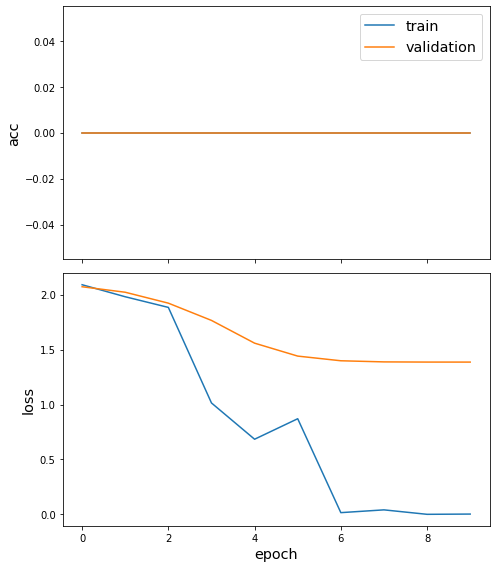

In [67]:
sg.utils.plot_history(history)

In [68]:
# A represents all nodes of the graph
A = np.array(list(g.nodes()))
A = np.reshape(A, (374,2))

[['17972_sym' '17972_rc']
 ['17941_sym' '17941_rc']
 ['17929_sym' '17929_rc']
 ['17896_sym' '17896_rc']
 ['17893_sym' '17893_rc']
 ['17861_sym' '17861_rc']
 ['17790_sym' '17790_rc']
 ['17780_sym' '17780_rc']
 ['17685_sym' '17685_rc']
 ['17662_sym' '17662_rc']
 ['17657_sym' '17657_rc']
 ['17648_sym' '17648_rc']
 ['17536_sym' '17536_rc']
 ['17526_sym' '17526_rc']
 ['17522_sym' '17522_rc']
 ['17510_sym' '17510_rc']
 ['17507_sym' '17507_rc']
 ['17426_sym' '17426_rc']
 ['17401_sym' '17401_rc']
 ['17388_sym' '17388_rc']
 ['17384_sym' '17384_rc']
 ['17329_sym' '17329_rc']
 ['17368_sym' '17368_rc']
 ['17317_sym' '17317_rc']
 ['17315_sym' '17315_rc']
 ['17314_sym' '17314_rc']
 ['17305_sym' '17305_rc']
 ['17279_sym' '17279_rc']
 ['17266_sym' '17266_rc']
 ['17265_sym' '17265_rc']
 ['17232_sym' '17232_rc']
 ['17218_sym' '17218_rc']
 ['17152_sym' '17152_rc']
 ['17121_sym' '17121_rc']
 ['17112_sym' '17112_rc']
 ['17092_sym' '17092_rc']
 ['17088_sym' '17088_rc']
 ['17070_sym' '17070_rc']
 ['16964_sym

In [69]:
generator = FullBatchLinkGenerator(g1, method="gcn")
flow = generator.flow(A)
all_predictions = model.predict(flow)

Using GCN (local pooling) filters...
1/1 [==============================] - 0s 114ms/step


In [34]:
all_predictions = all_predictions[0]
np.save('gcn_data/gcn_embeddings_5.npy', all_predictions)        # validation set also considered

In [73]:
def get_rank_list(symptom):     #symptom should be string
    sym = symptom + '_sym'
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if A[i,j] == sym:
                sym_emb = all_predictions[i, j]   # symptom embedding
                
    li = []
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            s = A[i, j]
            if s[-2:] == 'rc':
                li_sub = [s]
                rc_emb = all_predictions[i, j]
                li_sub.append(rc_emb)
                li.append(li_sub)       # list of root cause embeddings
                
    scores_list = []
    for sub_list in li:
        arr = sub_list[1]
        dot = np.dot(sym_emb, arr)     
        ele = [sub_list[0]]
        ele.append(dot)
        scores_list.append(ele)    # list of sym.rci
        
    return scores_list
    

In [74]:
ranks = get_rank_list('15934')

In [75]:
print(ranks)

[['17972_rc', 14.44058], ['17941_rc', 32.889908], ['17929_rc', 11.218217], ['17896_rc', 7.571992], ['17893_rc', 32.889908], ['17861_rc', 0.75188106], ['17790_rc', 3.8939495], ['17780_rc', 2.2305555], ['17685_rc', 16.945013], ['17662_rc', 32.889908], ['17657_rc', 14.44058], ['17648_rc', 5.6640553], ['17536_rc', 14.44058], ['17526_rc', 32.889908], ['17522_rc', 16.945013], ['17510_rc', 14.44058], ['17507_rc', 16.945013], ['17426_rc', 21.065882], ['17401_rc', 14.44058], ['17388_rc', 32.889908], ['17384_rc', 32.889908], ['17329_rc', 23.296299], ['17368_rc', 32.889908], ['17317_rc', 1.0042812], ['17315_rc', 1.0042812], ['17314_rc', 32.889908], ['17305_rc', 32.889908], ['17279_rc', 14.44058], ['17266_rc', 21.065882], ['17265_rc', 21.065882], ['17232_rc', 7.571992], ['17218_rc', 14.44058], ['17152_rc', 32.889908], ['17121_rc', 19.347824], ['17112_rc', 2.4657977], ['17092_rc', 2.1800146], ['17088_rc', 1.8740867], ['17070_rc', 32.889908], ['16964_rc', 21.065882], ['16906_rc', 16.945013], ['16856